# Continuous Glucose Monitoring Data Analysis Using *glucoCheck* Package



To begin with you will have to check if **python** and all the relevant packages are installed on your machine.
Detailed list, including how to install, can be accessed from the documentation page : https://snehg0205.github.io/index.html#chp1

The *glucoCheck* package can be downloaded from: XXXXXXXXXXXXXXXXXXXXXX, which will have to be explicitly imported.
Below we will be using publically available dataset from Hall et al. paper ( https://doi.org/10.1371/journal.pbio.2005143 ). Continuous glucose monitoring (CGM) data consists of 105426 glucose reading taken every 5min across 57 individuals, for convenience this data is readily available as part of the *glucoCheck* package. Otherwise you can load your data directly from your machine.

In [1]:

from GlucoCheck.glucoCheck import glucoCheckOps
import pandas as pd

glucoCheckObject = glucoCheckOps()


Using TensorFlow backend.


Object Created!


### Reading-in data
The following command illustrates how to extract the Hall dataset from the package

In [2]:
data = glucoCheckObject.hall_data
data.head()

,subjectId,Display Time,GlucoseValue
0,1636-69-001,2/3/14 03:42,93
1,1636-69-001,2/3/14 03:47,93
2,1636-69-001,2/3/14 03:52,93
3,1636-69-001,2/3/14 03:57,95
4,1636-69-001,2/3/14 04:02,96


### Initial data inspection and visualisation
To understand the overall data quality we need to inspect the data, this will help with data quality control. By typing the following comand we will get the table with few measures of data "goodness":

Here is the statistical analysis of the data:



,Subject ID,Length of readings,Max. Glucose Value,Mean Glucose Value,Missing Values,Percent of missing values,Average gap size,Days,Start,End
1,1636-69-032,1783,191,108.316,3,0.17,1.500000,6 days 04:29:00,2016-01-13 12:58:00,2016-01-19 17:32:00
2,2133-026,1782,166,82.692,6,0.34,2.000000,6 days 04:34:00,2017-04-19 14:10:00,2017-04-25 18:49:00
3,2133-009,1781,183,109.652,6,0.34,2.000000,6 days 04:30:00,2016-11-21 13:33:00,2016-11-27 18:08:00
4,1636-69-001,754,225,102.183,3,0.40,1.500000,2 days 14:44:00,2014-02-03 03:42:00,2014-02-05 18:31:00
5,2133-032,1781,147,99.475,8,0.45,1.600000,6 days 04:29:00,2017-05-19 13:31:00,2017-05-25 18:05:00
6,1636-69-048,1779,144,97.013,10,0.56,2.000000,6 days 04:29:00,2015-11-26 00:36:00,2015-12-02 05:10:00
7,2133-003,1805,190,100.043,12,0.66,4.000000,6 days 07:00:00,2016-09-02 17:51:00,2016-09-09 00:56:00
8,2133-006,1777,148,83.616,12,0.67,2.000000,6 days 04:25:00,2016-11-01 00:00:00,2016-11-07 04:30:00
9,2133-004,1776,246,126.619,17,0.95,1.888889,6 days 04:24:00,2016-09-21 00:04:00,2016-09-27 04:33:00
10,2133-008,1805,137,89.348,19,1.05,4.750000,6 days 07:29:00,2016-11-22 00:03:00,2016-11-28 07:37:00


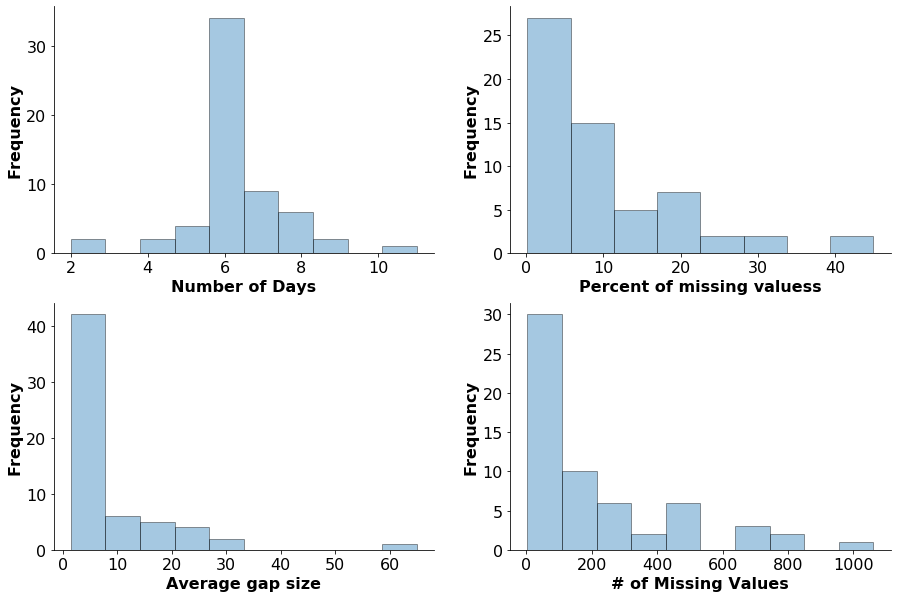

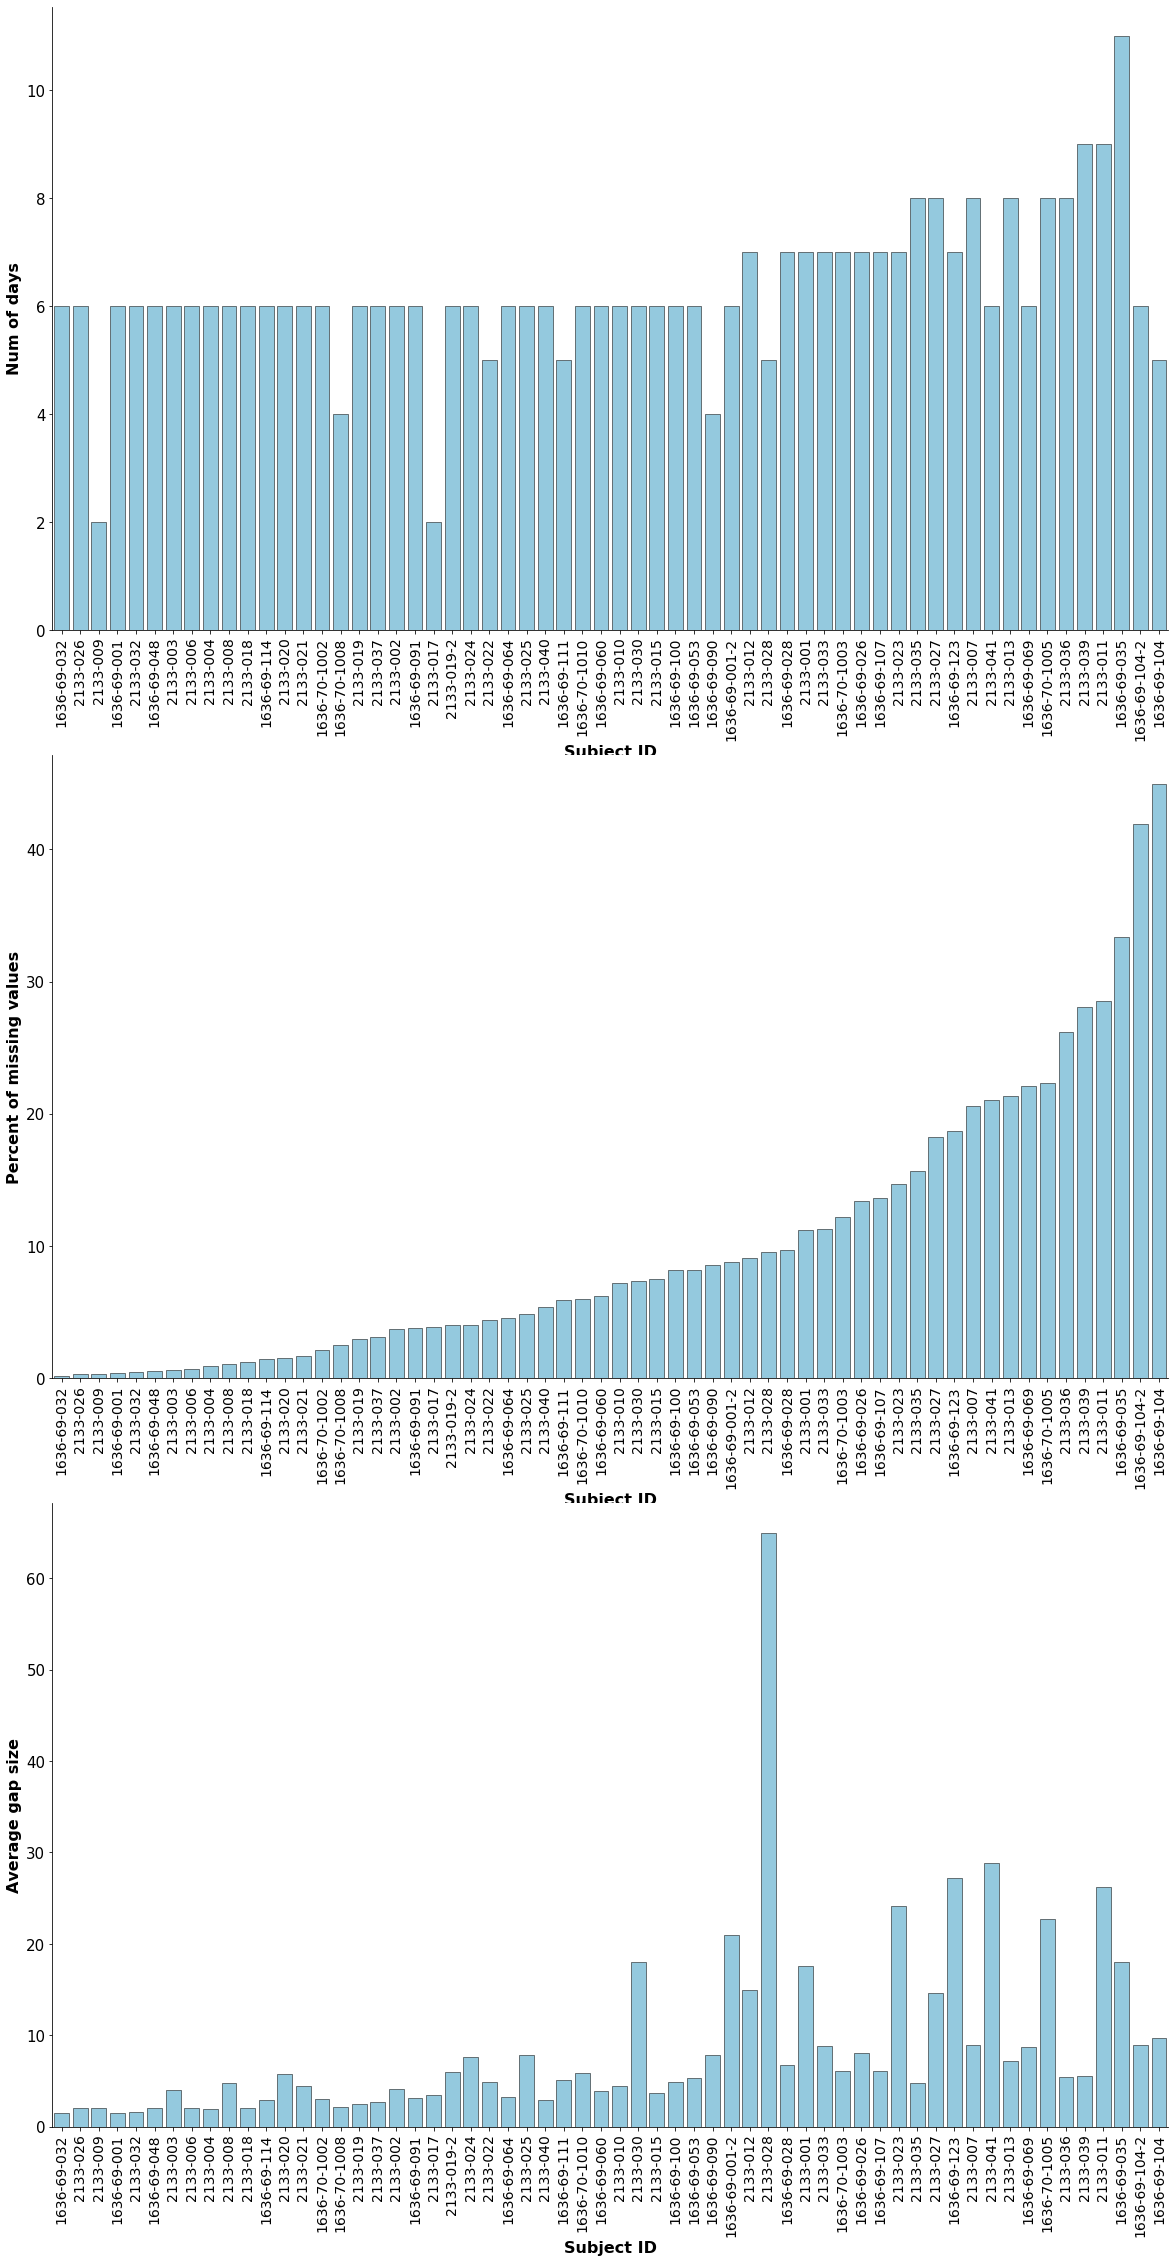

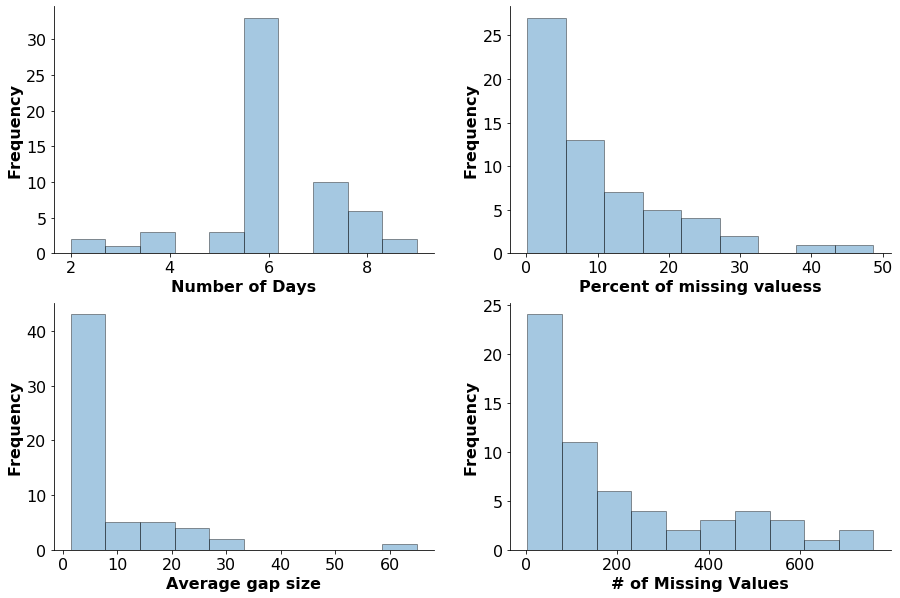

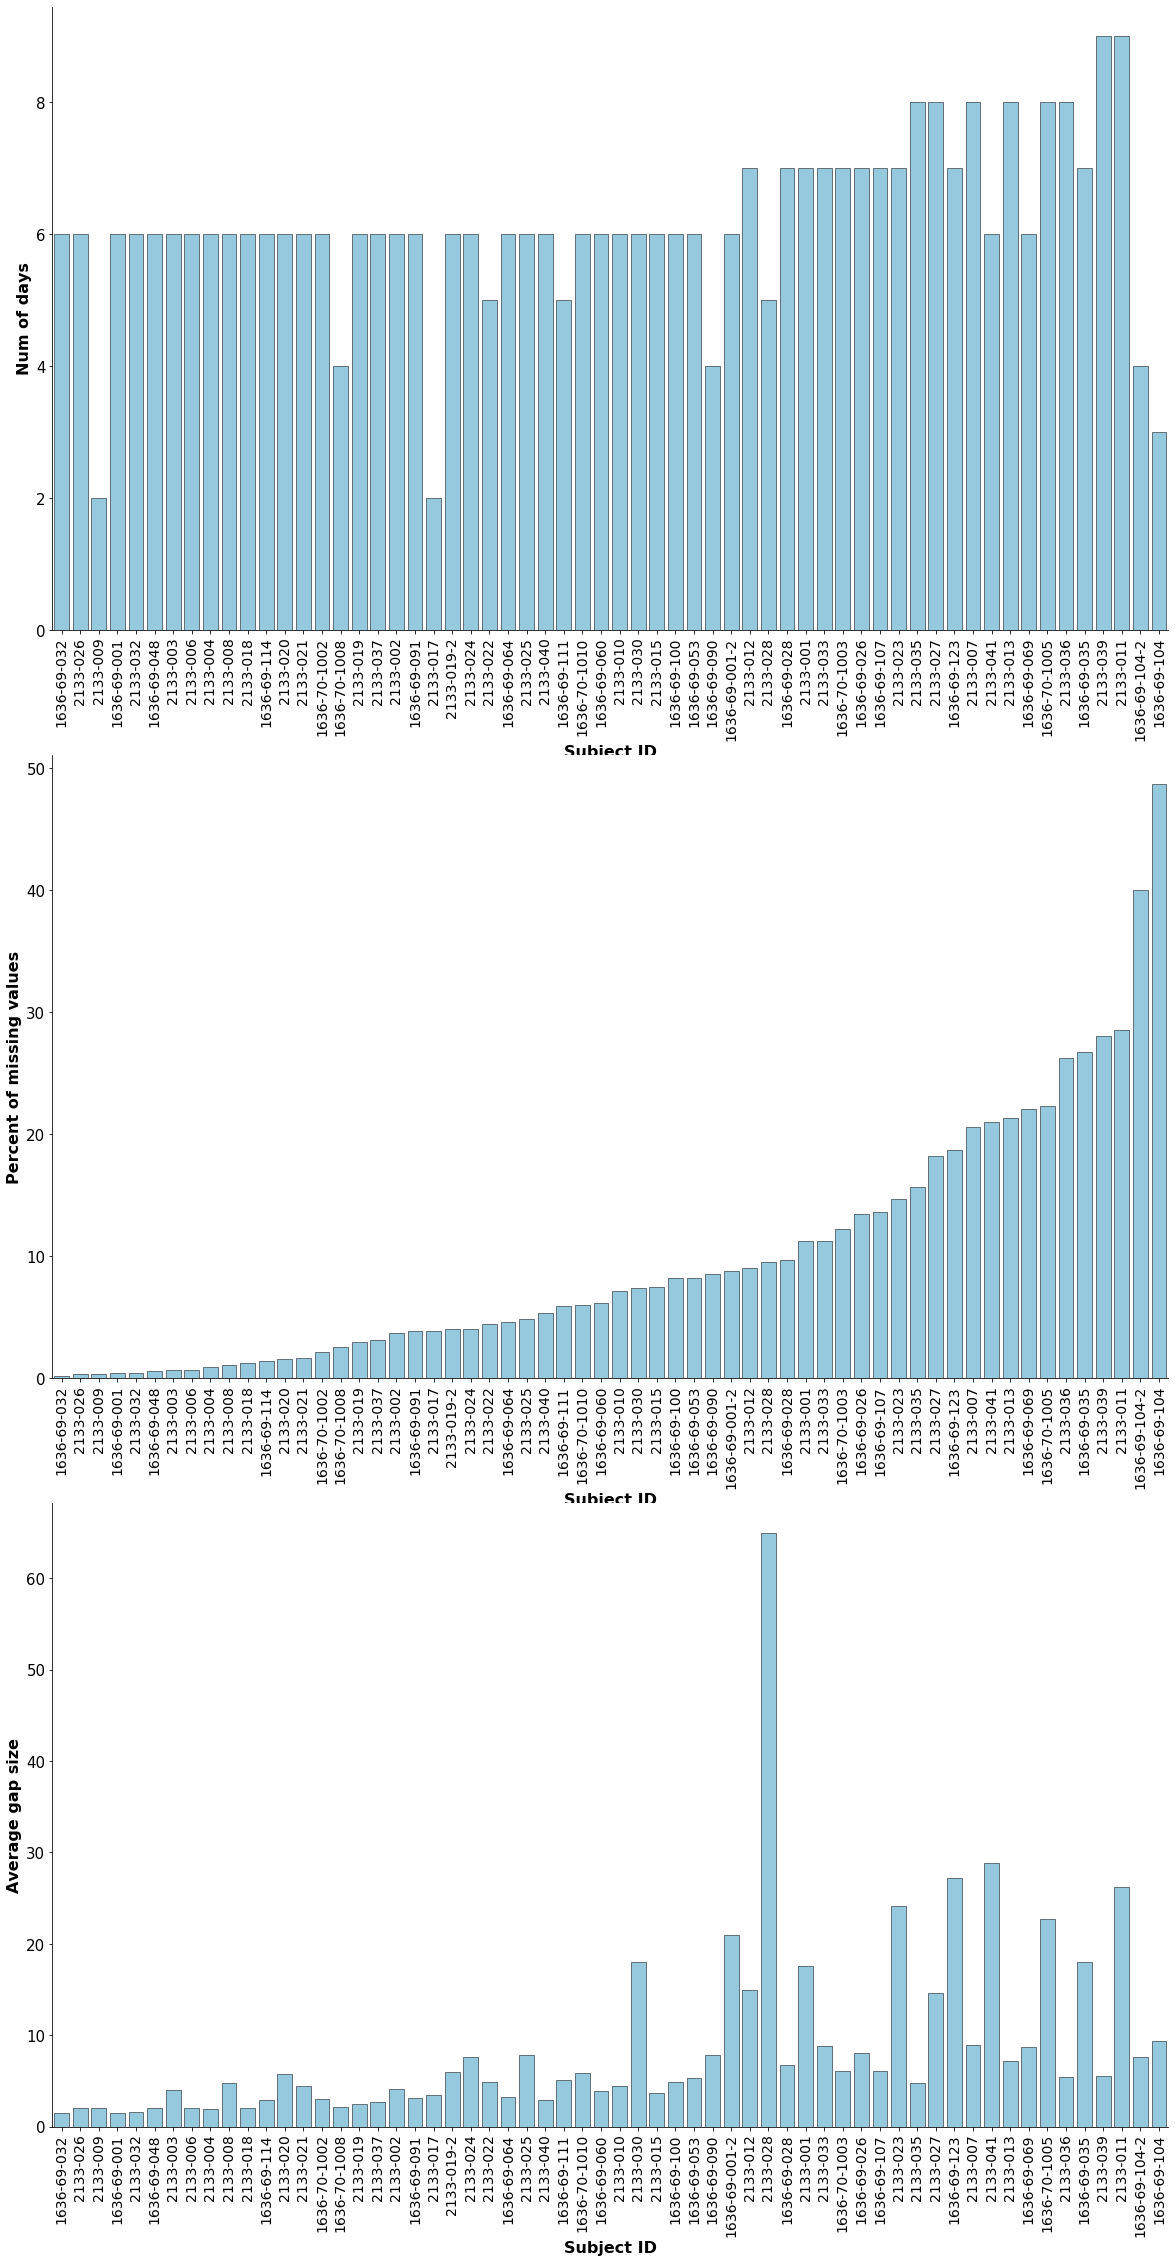

In [4]:
glucoCheckObject.dataDescribe(data)

### Calculating the variability indices
We calculate the following variability indices for all individuals:
- ADRR
- BGRI
- CONGAn
- Distance Travelled
- Estimated hbA1c
- GFI
- GLI
- GMI
- GRADE
- GVP
- IGC
- J - Index
- LAGE
- M - Value
- MAD
- MAG
- MAGE
- MODD
- PGS
- SD of ROC
- Summary Statistics
- Time in Range
- Variability Episodes



In [5]:
glucoCheckObject.gvIndices()

,ADDR,BGRI,LBGI,HBGI,CONGA1,CONGA2,CONGA4,DT,HBA1C,GFI,...,IQR,MAX,MIN,TAR_VH(%),TAR_H(%),TIR(%),TBR_L(%),TBR_VL(%),Hypoglycemic Episodes,Hyperglycemic Episodes
Subject ID,,,,,,,,,,,,,,,,,,,,,
1636-69-001,24.63,2.74,1.52,1.23,37.66,51.23,44.12,871.0,5.36,4.61,...,27.5,225.0,70.0,0.000,6.969,93.031,0.000,0.000,0,0
1636-69-001-2,13.29,1.14,0.48,0.66,8.42,11.19,8.74,2351.0,5.64,4.22,...,27.0,181.0,64.0,0.000,0.122,99.755,0.122,0.000,0,0
1636-69-026,11.54,0.96,0.36,0.60,3.88,4.15,3.65,4254.0,5.65,4.89,...,25.0,182.0,62.0,0.000,0.134,99.665,0.201,0.000,0,0
1636-69-028,7.27,0.93,0.64,0.29,2.90,3.39,4.35,3417.0,5.41,3.89,...,24.0,168.0,75.0,0.000,0.000,100.000,0.000,0.000,0,0
1636-69-032,7.21,0.74,0.60,0.14,2.67,3.53,3.82,3986.0,5.36,4.03,...,19.0,156.0,67.0,0.000,0.000,99.931,0.069,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OD575,45.36,6.70,1.83,4.87,0.96,1.46,1.80,47162.0,6.52,7.65,...,74.0,400.0,40.0,4.711,17.191,70.112,5.835,2.151,15,35
OD584,42.69,12.14,0.23,11.91,0.99,1.45,1.74,56562.0,8.30,9.24,...,84.0,400.0,40.0,17.096,33.630,48.462,0.501,0.311,1,191
OD588,31.17,7.53,0.34,7.19,0.82,1.21,1.56,50891.0,7.40,6.56,...,71.0,400.0,40.0,4.842,30.952,63.223,0.778,0.205,1,114


In [6]:
glucoCheckObject.gvIndices(data)

,ADDR,BGRI,LBGI,HBGI,CONGA1,CONGA2,CONGA4,DT,HBA1C,GFI,...,IQR,MAX,MIN,TAR_VH(%),TAR_H(%),TIR(%),TBR_L(%),TBR_VL(%),Hypoglycemic Episodes,Hyperglycemic Episodes
Subject ID,,,,,,,,,,,,,,,,,,,,,
1636-69-001,24.63,2.74,1.52,1.23,37.66,51.23,44.12,871.0,5.36,4.61,...,27.50,225,70,0.000,6.969,93.031,0.000,0.000,0,0
1636-69-001-2,13.29,1.14,0.48,0.66,8.42,11.19,8.74,2351.0,5.64,4.22,...,27.00,181,64,0.000,0.122,99.755,0.122,0.000,0,0
1636-69-026,11.54,0.96,0.36,0.60,3.88,4.15,3.65,4254.0,5.65,4.89,...,25.00,182,62,0.000,0.134,99.665,0.201,0.000,0,0
1636-69-028,7.27,0.93,0.64,0.29,2.90,3.39,4.35,3417.0,5.41,3.89,...,24.00,168,75,0.000,0.000,100.000,0.000,0.000,0,0
1636-69-032,7.21,0.74,0.60,0.14,2.67,3.53,3.82,3986.0,5.36,4.03,...,19.00,156,67,0.000,0.000,99.931,0.069,0.000,0,0
1636-69-035,10.71,1.44,0.63,0.81,1.76,2.76,2.77,4667.0,5.65,5.30,...,33.00,194,69,0.000,0.414,99.379,0.207,0.000,0,0
1636-69-048,8.89,1.44,1.42,0.02,2.78,3.44,3.94,3425.0,5.00,3.37,...,16.50,136,63,0.000,0.000,99.233,0.767,0.000,0,0
1636-69-053,12.16,1.50,1.26,0.24,3.32,4.00,4.26,3503.0,5.12,3.50,...,17.00,183,66,0.000,0.122,99.512,0.366,0.000,0,0
1636-69-060,5.82,0.87,0.08,0.79,2.42,2.76,2.92,3636.0,5.94,3.47,...,20.00,181,91,0.000,0.061,99.939,0.000,0.000,0,0


### Visualizing an individual

The following command shows how to visualize the glucose variability of an individual. You need to pass the subject ID of the individual you wish to visualize

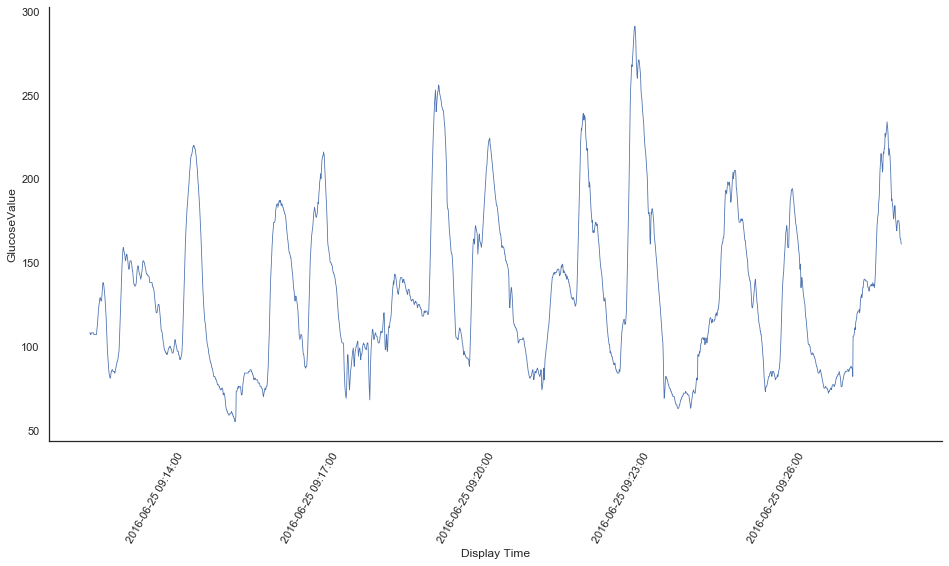

In [7]:
glucoCheckObject.plotIndividual('ID01')

### Training the model

Training the model on the preloaded dataset (described above)



In [8]:
glucoCheckObject.train()

Model trained successfully!


### Reading the test file

In [9]:
testdatafile = pd.read_csv("~/Desktop/NCSA_genomics/testing_file.csv")

### Imputing the data

In [10]:
glucoCheckObject.impute(testdatafile)

,Unnamed: 0,subjectId,Display Time,GlucoseValue
0,0,1636-69-032,1/13/16 12:58,122.0
1,1,1636-69-032,1/13/16 13:03,123.0
2,2,1636-69-032,1/13/16 13:08,124.0
3,3,1636-69-032,1/13/16 13:13,128.0
4,4,1636-69-032,1/13/16 13:18,133.0
...,...,...,...,...
1778,1778,1636-69-032,1/19/16 17:12,161.0
1779,1779,1636-69-032,1/19/16 17:17,0.0
1780,1780,1636-69-032,1/19/16 17:22,101.0
1781,1781,1636-69-032,1/19/16 17:27,106.0
